### Ana Maria Renno Pocai
### Xinyi Wang 

## Introduction

For our data analysis project, we chose to explore the gender disparity in STEM fields, particularly in Computer Science and Engineering. The underrepresentation of women in these areas is a well-known issue, but we wanted to analyze real academic performance data to investigate two key questions:

1. Are there actually fewer women in fields like Computer Science and Engineering?
2. If so, why?

To explore this, we used the dataset `academic_performance_dataset_V2`, which contains academic records, including gender, program code, year of graduation (YoG), and GPA scores across different academic levels. This allows us to analyze not only the number of women in each field but also how their academic performance compares to that of their male counterparts.

One of our main hypotheses is that women must work harder than men to enter and succeed in these areas due to societal expectations, biases, and structural barriers. Through this analysis, we aim to provide data-driven insights into gender disparities in STEM education and contribute to the discussion on equity and inclusion in these fields.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("academic_performance_dataset_V2.csv")

df.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


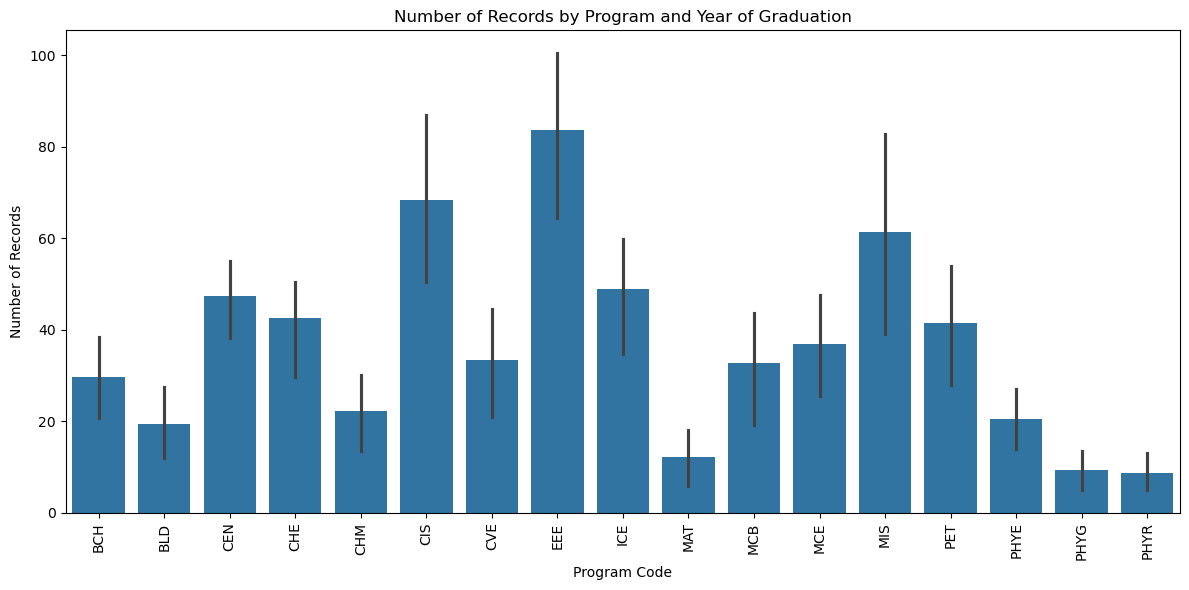

In [7]:
# Count the data by 'YoG' (Year of Graduation) and 'Prog Code' (Program Code)
count_by_subject = df.groupby(['YoG', 'Prog Code']).size()

# Reset the index to make it easier for plotting
count_by_subject = count_by_subject.reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', data=count_by_subject)

# Rotate the X-axis labels for better visibility
plt.xticks(rotation=90)

# Add title and labels
plt.title('Number of Records by Program and Year of Graduation')
plt.xlabel('Program Code')
plt.ylabel('Number of Records')

# Display the plot
plt.tight_layout()
plt.show()


In our analysis, we grouped the data by Year of Graduation (YoG) and Program Code (Prog Code) to count how many students are enrolled in each program. By resetting the index and counting the number of records for each combination of YoG and Prog Code, we created a bar chart to visually represent the distribution of students across different programs and years. This helps us better understand the number of students in each field, making it easier to spot trends and disparities in program participation over time.


We sorted the dataset by 'YoG' (Year of Graduation) and 'Prog Code' (Program Code). Then, we grouped the data by 'YoG', 'Prog Code', and 'Gender' to count the number of male and female students. Using unstack(), we separated the counts into 'Female' and 'Male' columns. Lastly, we calculated the percentage of female students by dividing the number of females by the total students (male + female) and multiplying by 100.

In [8]:
df_sorted = df.sort_values(by=['YoG', 'Prog Code'])
gender_counts = df.groupby(['YoG', 'Prog Code', 'Gender']).size().unstack(fill_value=0)
gender_counts['Female_Percentage'] = (gender_counts['Female'] / (gender_counts['Female'] + gender_counts['Male'])) * 100
gender_counts

Gender          Female  Male  Female_Percentage
YoG  Prog Code                                 
2010 BCH            10     8          55.555556
     BLD             3     5          37.500000
     CEN            19    42          31.147541
     CHE            21    30          41.176471
     CHM             5     2          71.428571
...                ...   ...                ...
2014 MIS            24    20          54.545455
     PET            19    33          36.538462
     PHYE            4    14          22.222222
     PHYG            1     5          16.666667
     PHYR            0     8           0.000000

[81 rows x 3 columns]

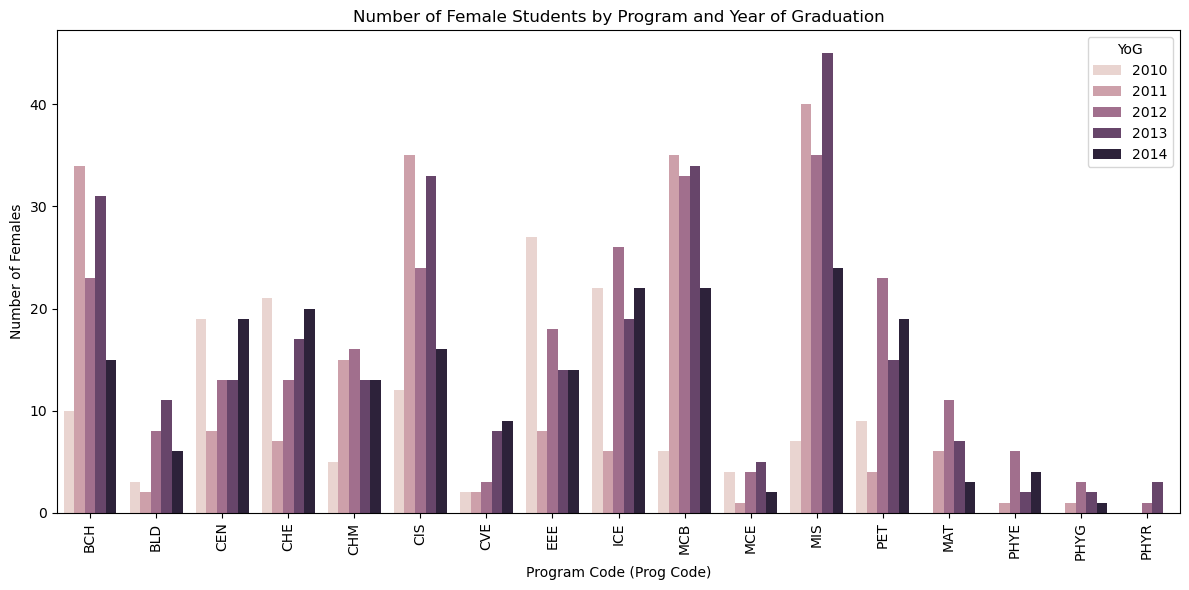

In [9]:
# Filter the data for females
df_female = df[df['Gender'] == 'Female']

# Count the number of records by 'YoG', 'Prog Code', and 'Gender'
female_counts = df_female.groupby(['YoG', 'Prog Code']).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Prog Code', y='Count', hue='YoG', data=female_counts)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add title and labels
plt.title('Number of Female Students by Program and Year of Graduation')
plt.xlabel('Program Code (Prog Code)')
plt.ylabel('Number of Females')

# Show the plot
plt.tight_layout()
plt.show()


For our analysis, we filtered the dataset to focus specifically on female students. We then grouped the data by 'YoG' (Year of Graduation) and 'Prog Code' (Program Code) to count the number of female students in each program and year. This allows us to visualize the distribution of female students across different academic years and programs. The bar chart we created helps us get a better sense of the number of female students in each program, which is essential for understanding any gender-related trends or disparities.

The dataset contained various subjects, making it difficult to visualize and analyze the gender distribution across different fields. To simplify the analysis and make it more meaningful, we decided to group the subjects into broader topics. Each topic includes a set of related subjects, such as "biology," "computer science," and "math."

We then calculated the percentage of female students for each topic by averaging the female percentages for all subjects within that topic across different years. This approach allows us to better understand the gender representation within each topic, making the data easier to interpret and compare.

Finally, we organized the results into a DataFrame to clearly present the average female percentages for each topic over the years.

In [10]:
# Definindo os tópicos e suas respectivas matérias
topics = {
    'biology': ['BCH', 'MCB'],
    'computer_science': ['CEN', 'CIS', 'ICE'],
    'tech': ['BLD', 'MIS'],
    'math': ['MAT'],
    'physics': ['PHYG', 'PHYR', 'PHYE'],
    'Chemistry' : ['CHE','CHM' ,'PET'],
    'Mecanics' : ['CVE', 'MCE', 'BLD']
}

# Criar um novo DataFrame para armazenar as porcentagens de mulheres por tópico
topic_percentages = {}

# Iterar sobre os tópicos e calcular a porcentagem de mulheres para cada grupo
for topic, subjects in topics.items():
    # Filtra as matérias que pertencem ao tópico
    filtered_data = gender_counts[gender_counts.index.get_level_values('Prog Code').isin(subjects)]
    
    # Calcular a porcentagem de mulheres por ano para esse grupo de matérias
    female_percentage_by_year = filtered_data.groupby('YoG')['Female_Percentage'].mean()
    
    # Adicionar o resultado ao dicionário
    topic_percentages[topic] = female_percentage_by_year

# Criar um DataFrame com as porcentagens para cada tópico
topic_percentage_df = pd.DataFrame(topic_percentages)

# Exibir o DataFrame final
topic_percentage_df

,biology,computer_science,tech,math,physics,Chemistry,Mecanics
YoG,,,,,,,
2010,65.277778,31.325051,36.250000,0.000000,NaN,48.646125,20.526756
2011,81.201550,33.891726,34.090909,42.857143,17.500000,39.973803,13.040663
2012,77.619048,37.773774,45.358187,52.380952,20.952381,40.315067,19.376968
2013,77.745995,29.528478,41.912775,36.842105,15.384615,35.218012,20.020425
2014,81.781377,38.898458,38.383838,60.000000,12.962963,52.334716,16.311782


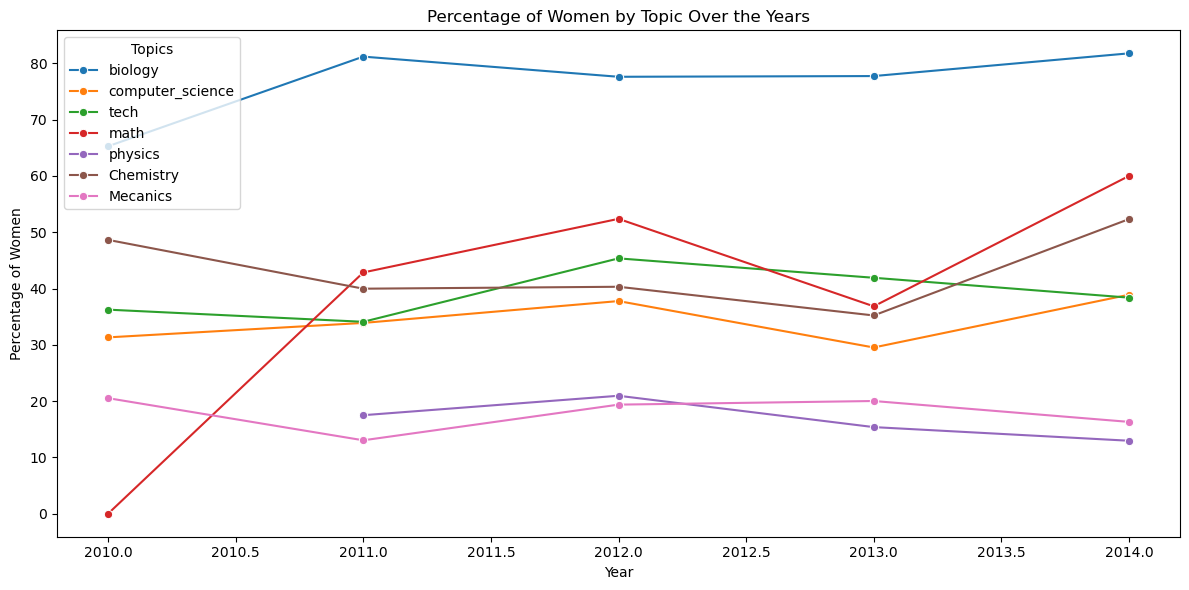

In [11]:
# Converting the DataFrame to a 'long' format to make it easier to plot
topic_percentage_df = topic_percentage_df.reset_index()
topic_percentage_df = topic_percentage_df.melt(id_vars='YoG', 
                                                value_vars=topics.keys(), 
                                                var_name='Topic', 
                                                value_name='Female_Percentage')

# Creating the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YoG', y='Female_Percentage', hue='Topic', data=topic_percentage_df, marker='o')

# Adding title and labels
plt.title('Percentage of Women by Topic Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Women')

# Displaying the legend
plt.legend(title='Topics')

# Displaying the plot
plt.tight_layout()
plt.show()


In this step, we converted the topic_percentage_df DataFrame from a wide format to a long format. This is done using the melt function, which rearranges the DataFrame so that each row represents a unique combination of year and topic, making it easier to plot. The columns for each topic become a single 'Topic' column, and the corresponding female percentages for each topic are stored in the 'Female_Percentage' column.

After reshaping the data, we created a line plot using Seaborn, where the x-axis represents the years (YoG), the y-axis represents the percentage of women (Female_Percentage), and each line represents a different topic. The hue parameter differentiates the lines by topic, allowing us to visualize the trend of female representation across various topics over time.